In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import corner

In [15]:
param_names = ['kappa','mu','attenu','kappa0','lambd']

#name1 = '../output/210726-133639_M-I5-D2'
#name1 = '../output/210727-141024_M-I5-E1'
#name1 = '../output/210805-031128_M-I5-F1'
#name1 = '../output/210805-161158_M-I5-G1-test'
#name1 = '../output/210805-164515_M-I5-G1-test'
#name1 = '../output/210806-033752_M-I6-A1-final'
name1 = '../output/210807-195122_3p-calbay-A1'

#parameter that excludes 0 in range
param_nonzero = 2
finish = False

In [16]:
file1 = h5py.File(name1+'.h5', 'r')
#file2 = h5py.File(name2+'.h5', 'r')
#file3 = h5py.File(name3+'.h5', 'r')

chain1 = np.array(file1.get('mcmc').get('chain'))
#chain2 = np.array(file2.get('mcmc').get('chain'))
#chain3 = np.array(file2.get('mcmc').get('chain'))

if not finish:
    nsteps1 = np.where(chain1[:,0,param_nonzero]==0)[0][0]
    #nsteps2 = np.where(chain2[:,0,param_nonzero]==0)[0][0]
    #nsteps3 = np.where(chain3[:,0,param_nonzero]==0)[0][0]

    chain1 = np.array(file1.get('mcmc').get('chain'))[:nsteps1]
    #chain2 = np.array(file2.get('mcmc').get('chain'))[:nsteps2]
    #chain3 = np.array(file3.get('mcmc').get('chain'))[:nsteps3]
    
print('File 1 shape: ', chain1.shape)
#print('File 2 shape: ', chain2.shape)
#print('File 3 shape: ', chain3.shape)

prob1 = np.array(file1.get('mcmc').get('log_prob'))
#prob2 = np.array(file2.get('mcmc').get('log_prob'))
#prob3 = np.array(file3.get('mcmc').get('log_prob'))

accepted1 = np.array(file1.get('mcmc').get('accepted'))
#accepted2 = np.array(file2.get('mcmc').get('accepted'))
#accepted2 = np.array(file3.get('mcmc').get('accepted'))

File 1 shape:  (268, 16, 3)


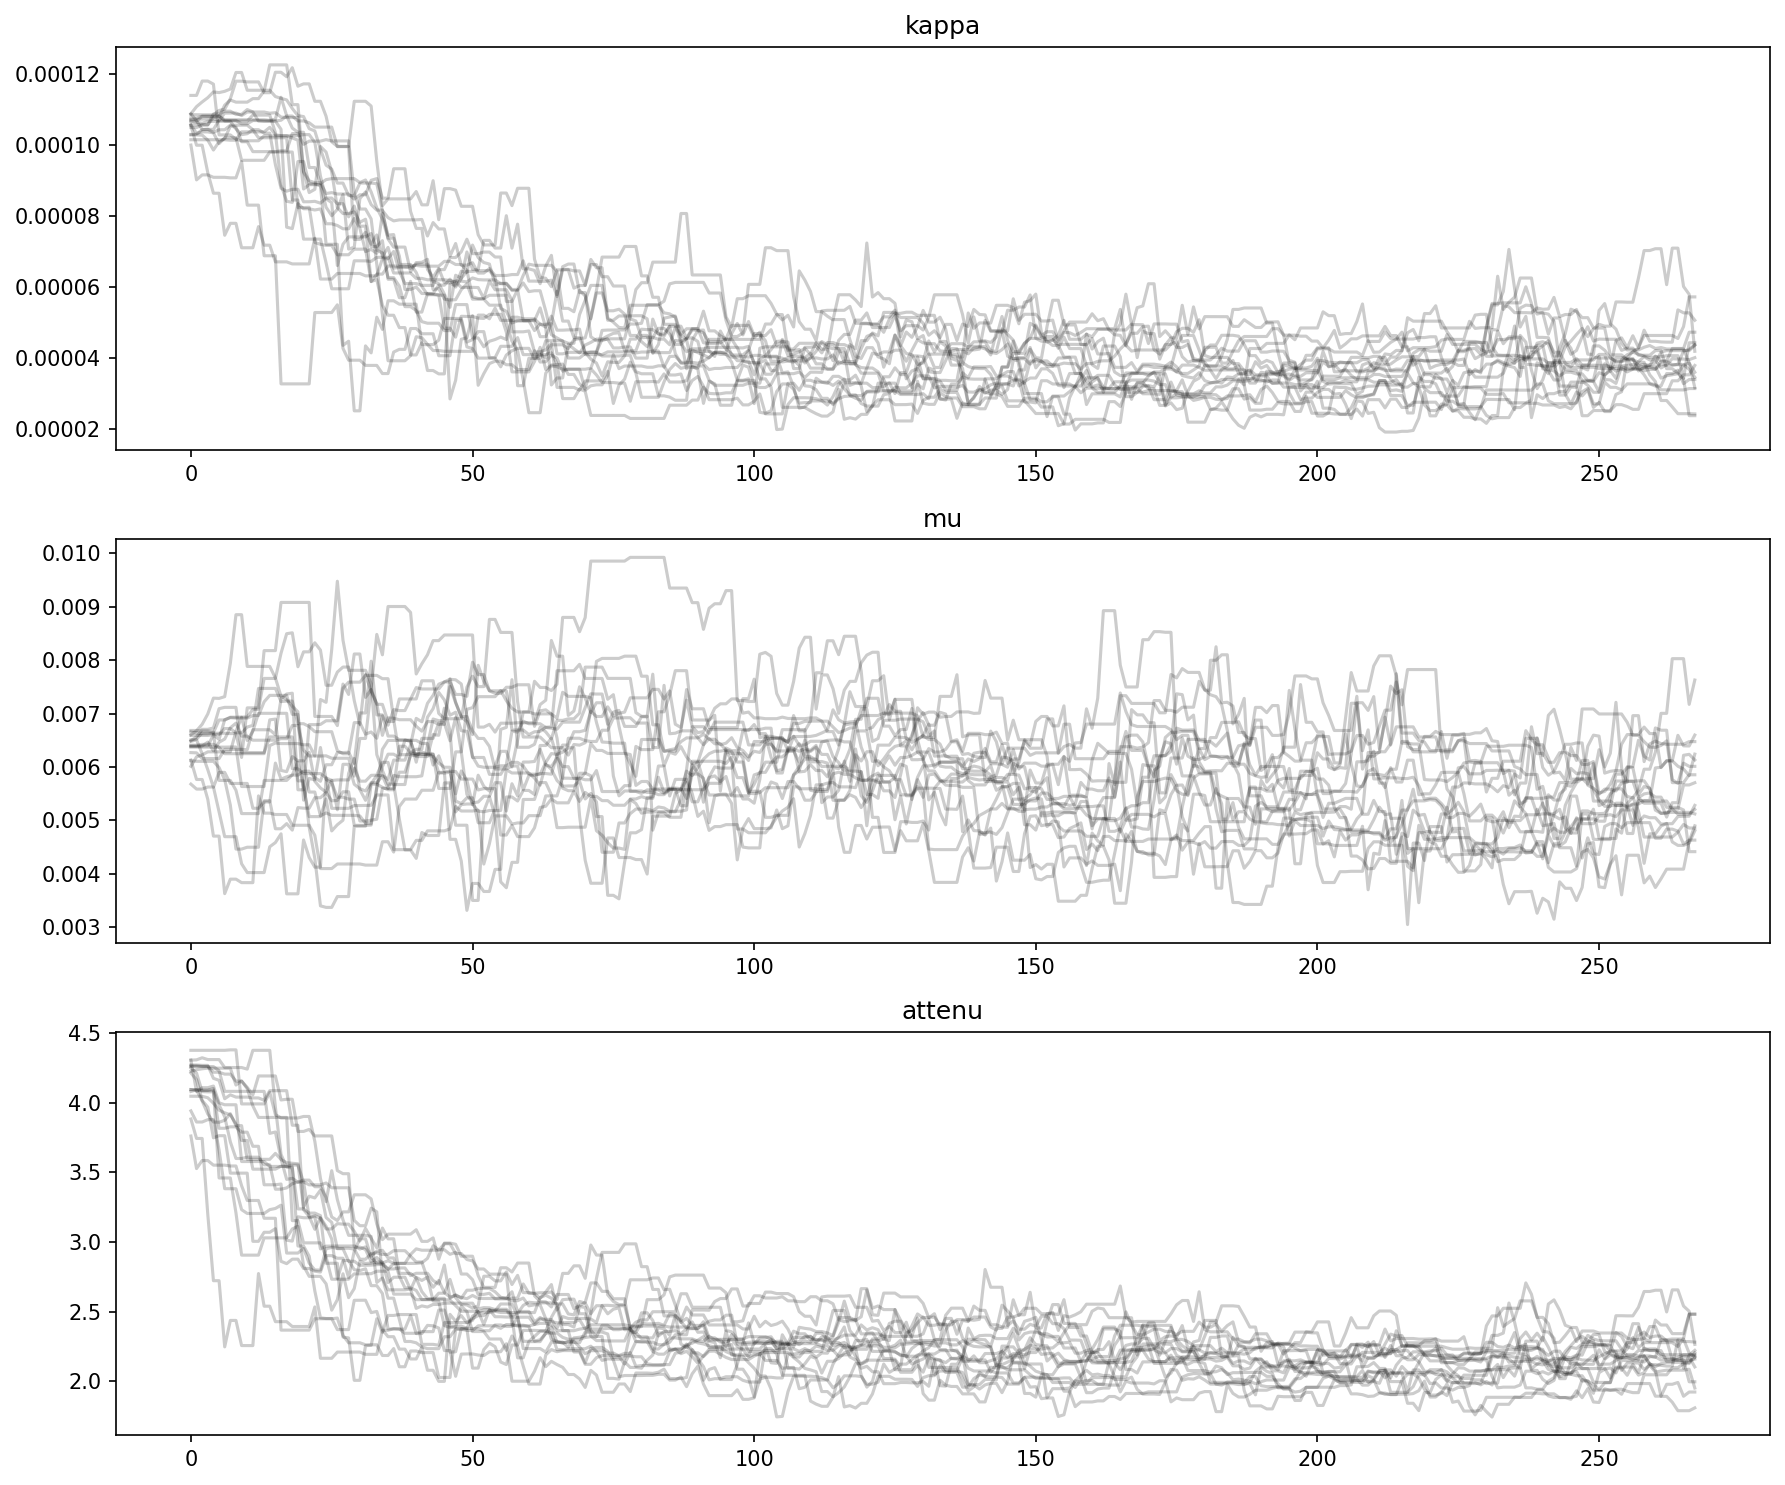

In [20]:
fig, ax = plt.subplots(3,1,figsize=(12,10),dpi=150)
for i in range(3):
    ax[i].plot(chain1[:,:,i],c='k',alpha=0.2)
    ax[i].set(title=param_names[i])
    
fig.tight_layout()
plt.show()

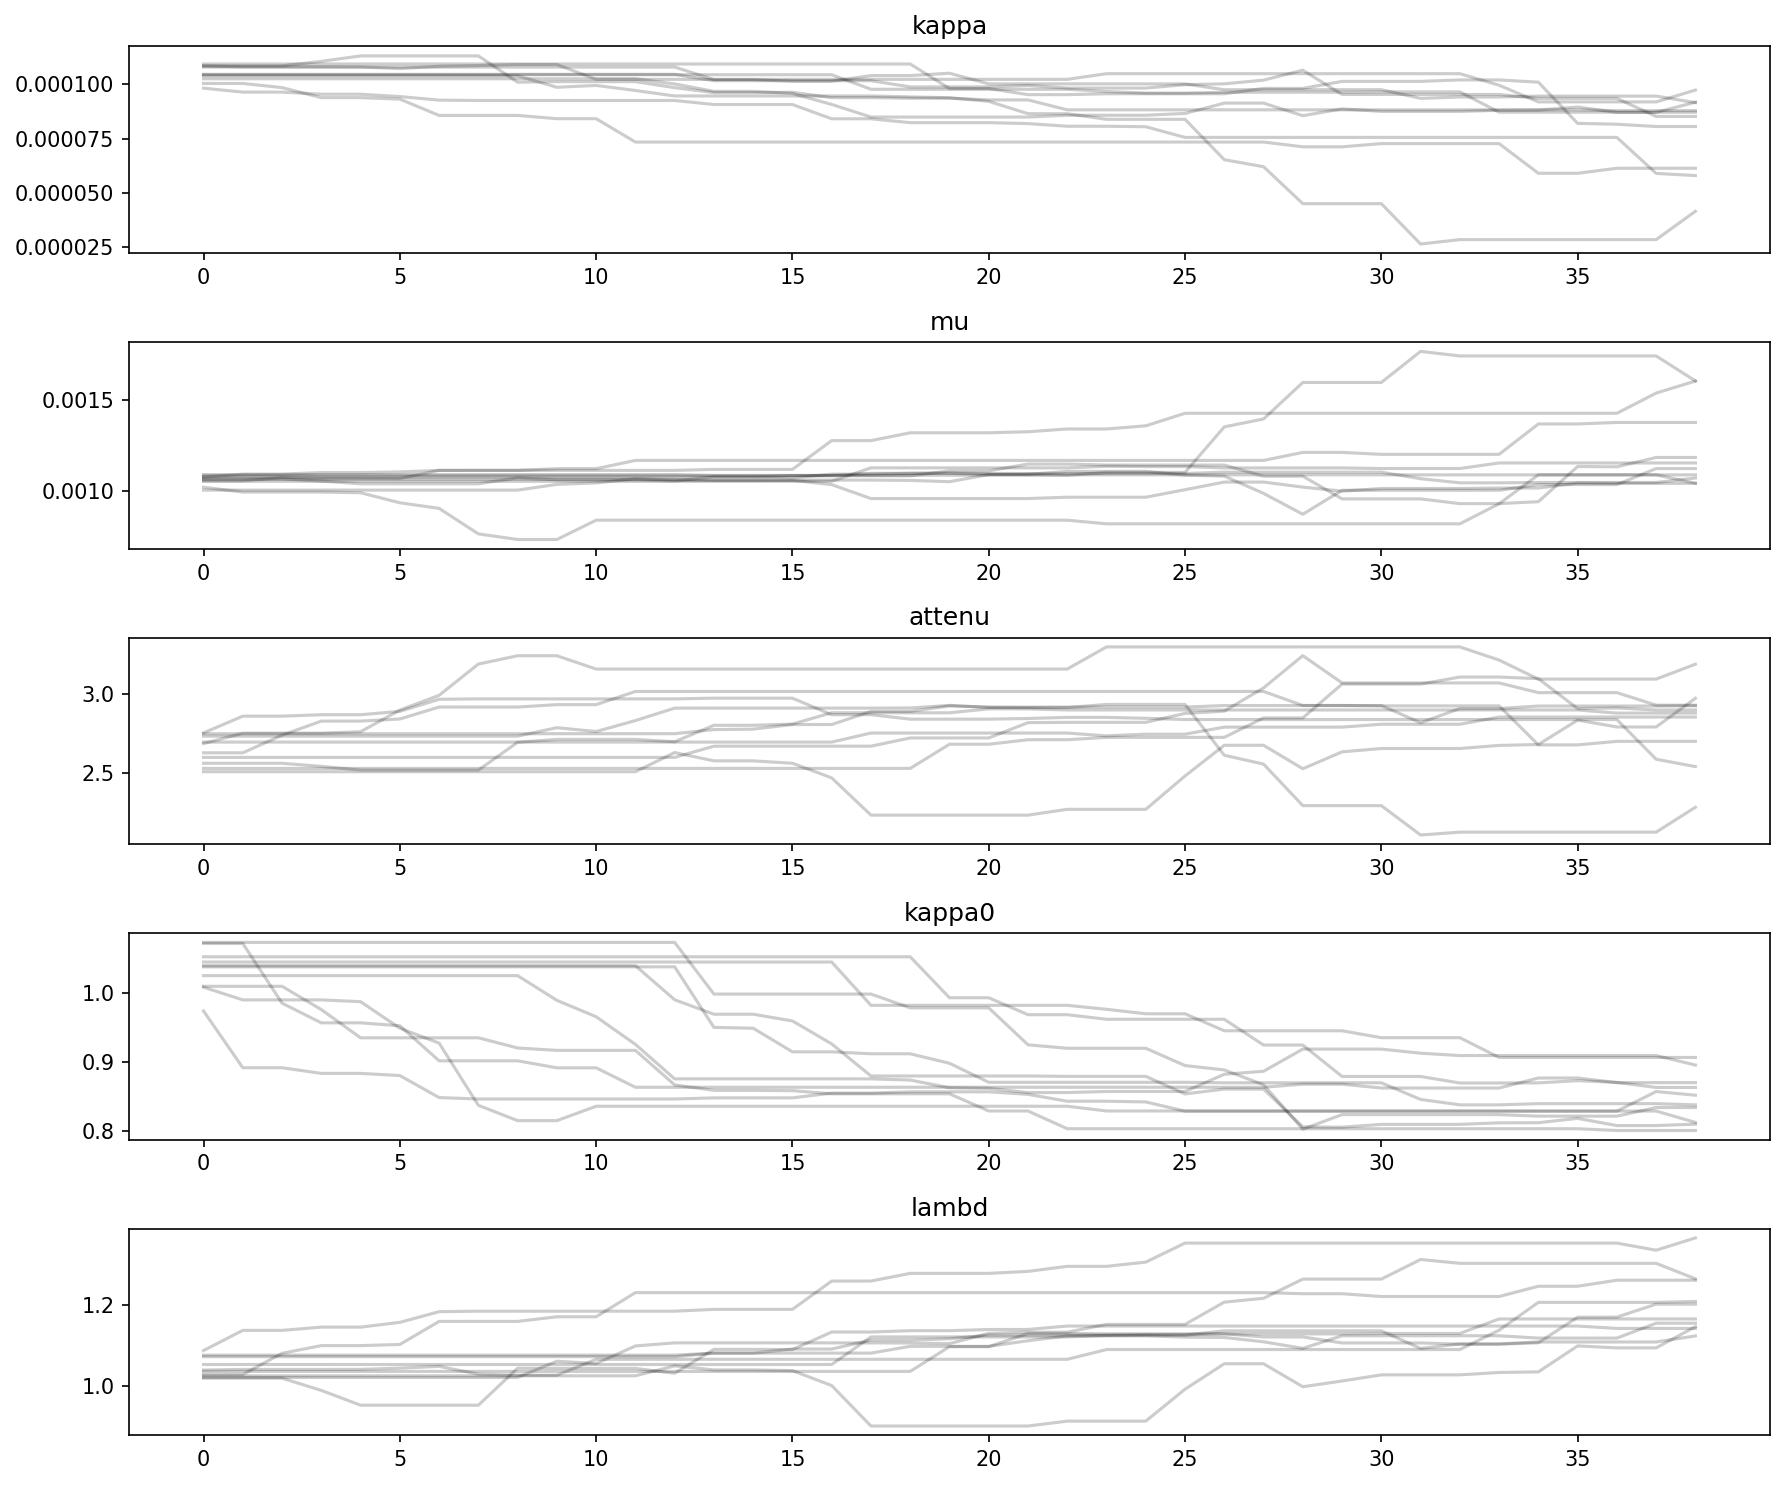

In [19]:
fig, ax = plt.subplots(len(param_names),1,figsize=(12,10),dpi=150)
for i in range(len(param_names)):
    ax[i].plot(chain1[:,:,i],c='k',alpha=0.2)
    ax[i].set(title=param_names[i])
    
fig.tight_layout()
plt.show()

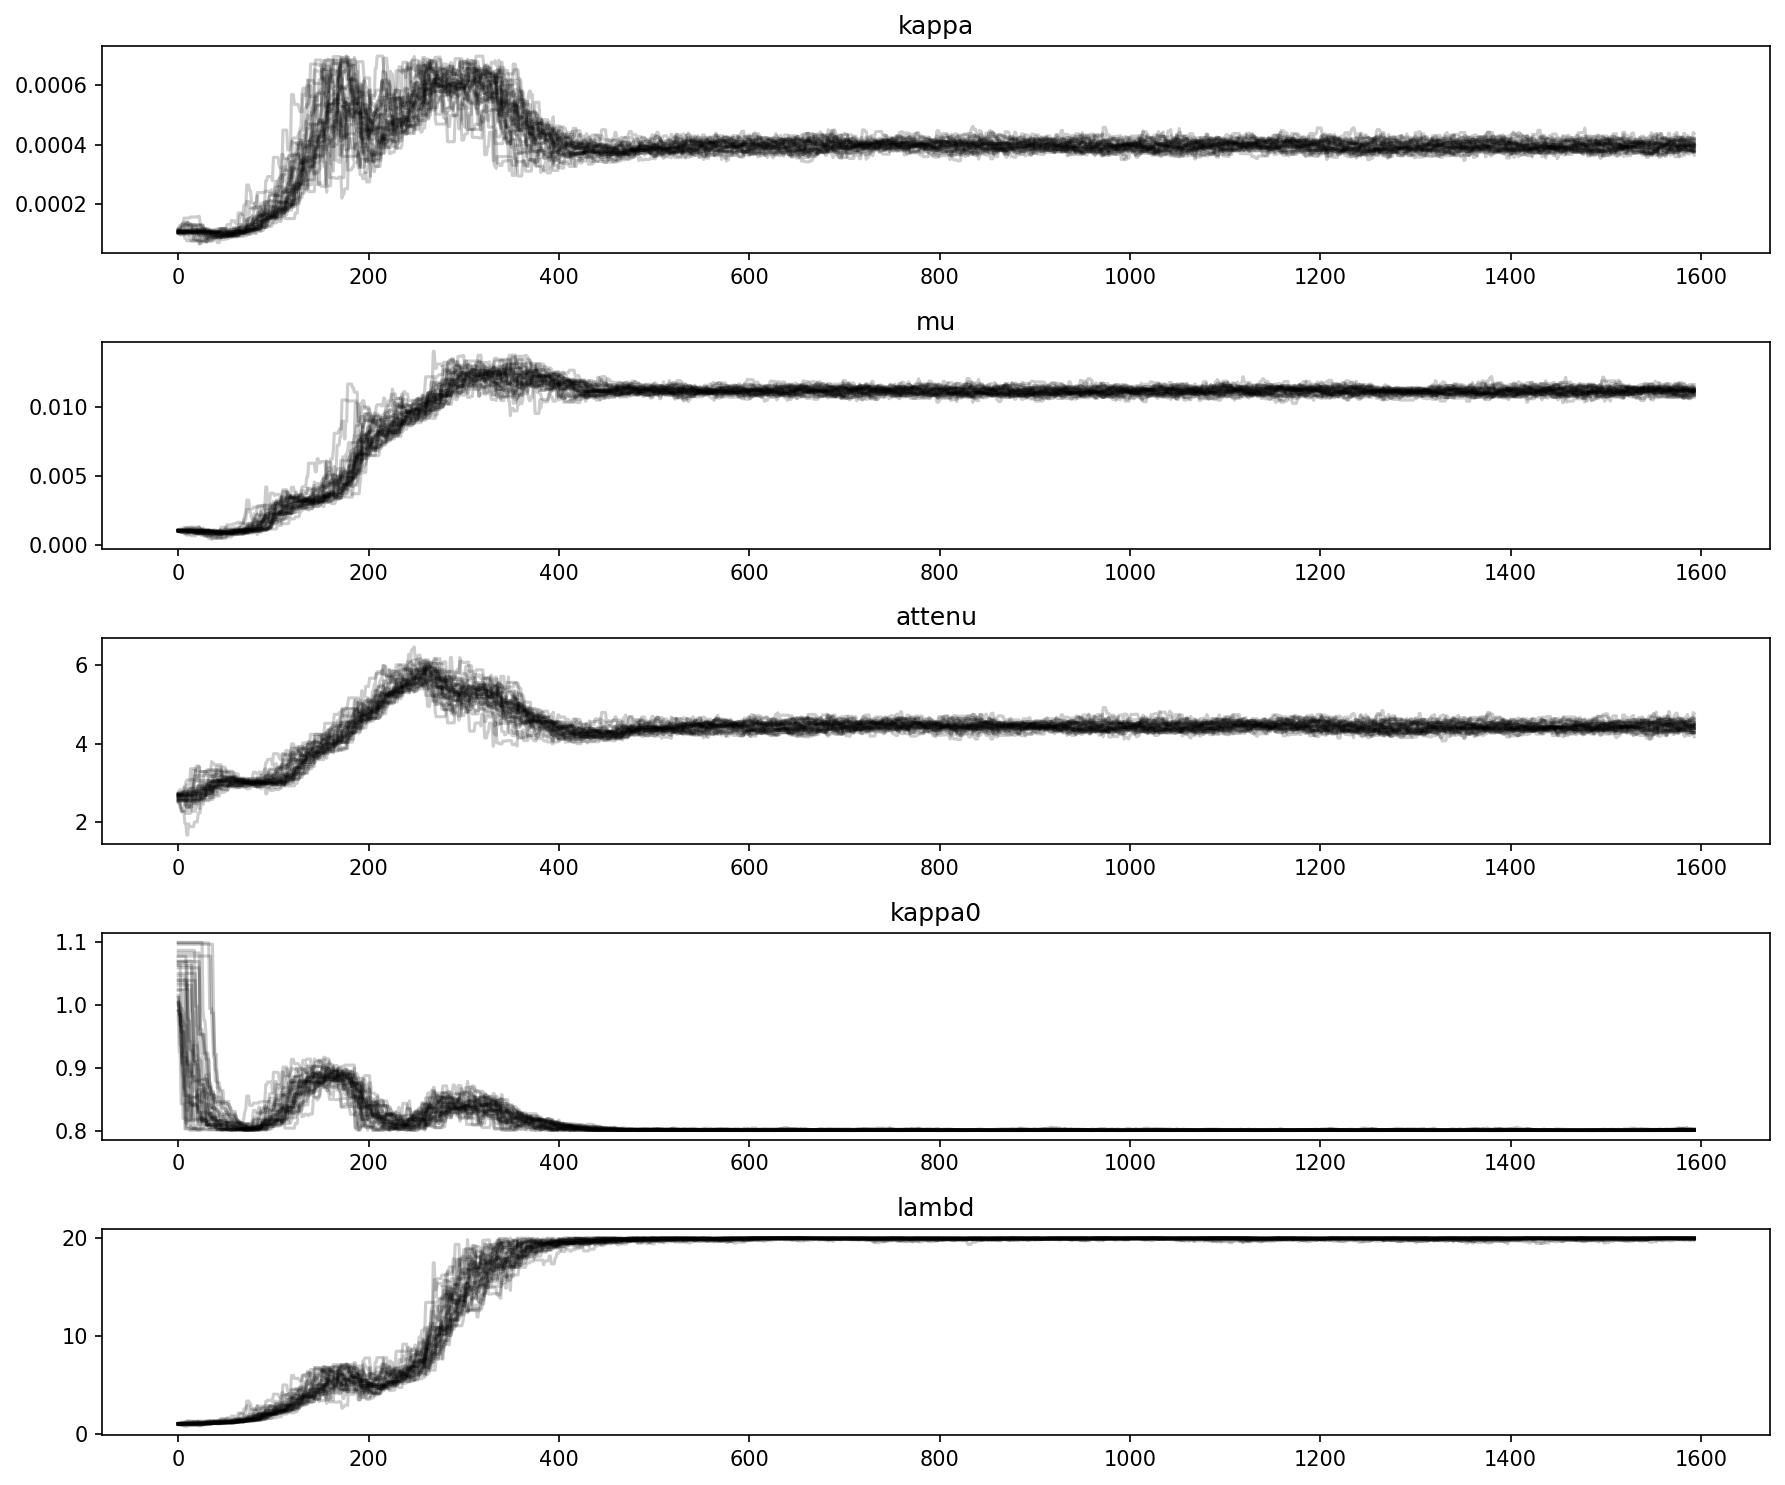

In [4]:
fig, ax = plt.subplots(len(param_names),1,figsize=(12,10),dpi=150)
for i in range(len(param_names)):
    ax[i].plot(chain1[:,:,i],c='k',alpha=0.2)
    ax[i].set(title=param_names[i])
    
fig.tight_layout()
plt.show()

### Choose burnin

In [12]:
burnin = 250

chain1_flat = chain1[burnin:,:,:].reshape((chain1.shape[0]-burnin)*chain1.shape[1],len(param_names))
#chain2_flat = chain2[burnin:,:,:].reshape((chain2.shape[0]-burnin)*chain2.shape[1],len(param_names))
#chain3_flat = chain3[burnin:,:,:].reshape((chain3.shape[0]-burnin)*chain3.shape[1],len(param_names))

### Corner plot file 1

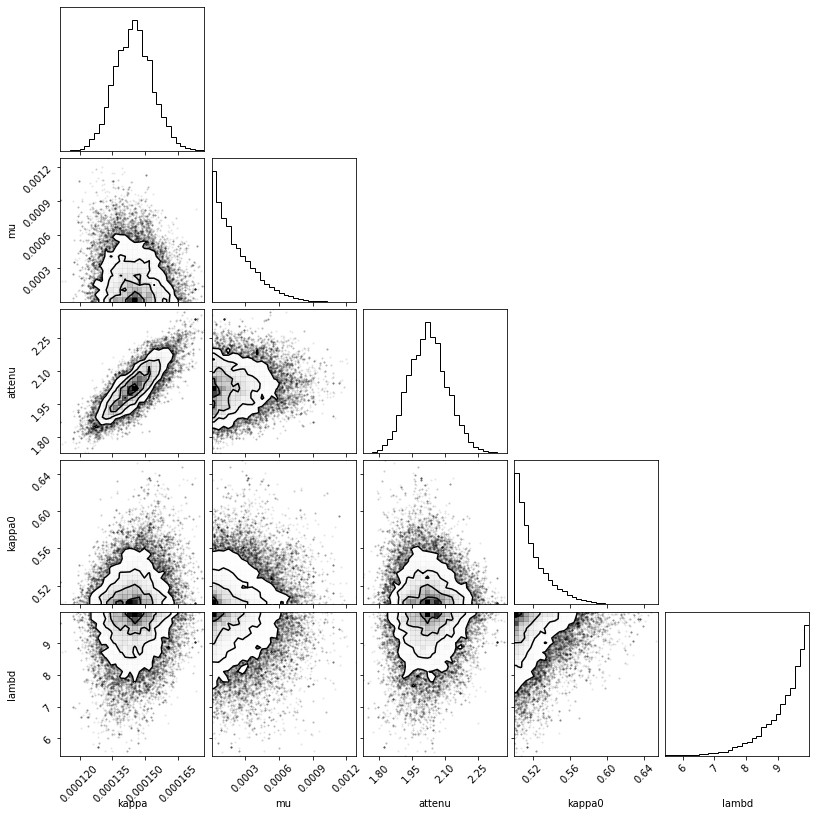

In [14]:
fig = corner.corner(
    chain1_flat, labels=param_names,bins=30)

### Corner plot file 2

In [ ]:
fig = corner.corner(
    chain2_flat, labels=param_names,bins=100)

### Corner plot file 3

In [ ]:
fig = corner.corner(
    chain3_flat, labels=param_names,bins=50)

## Log probability

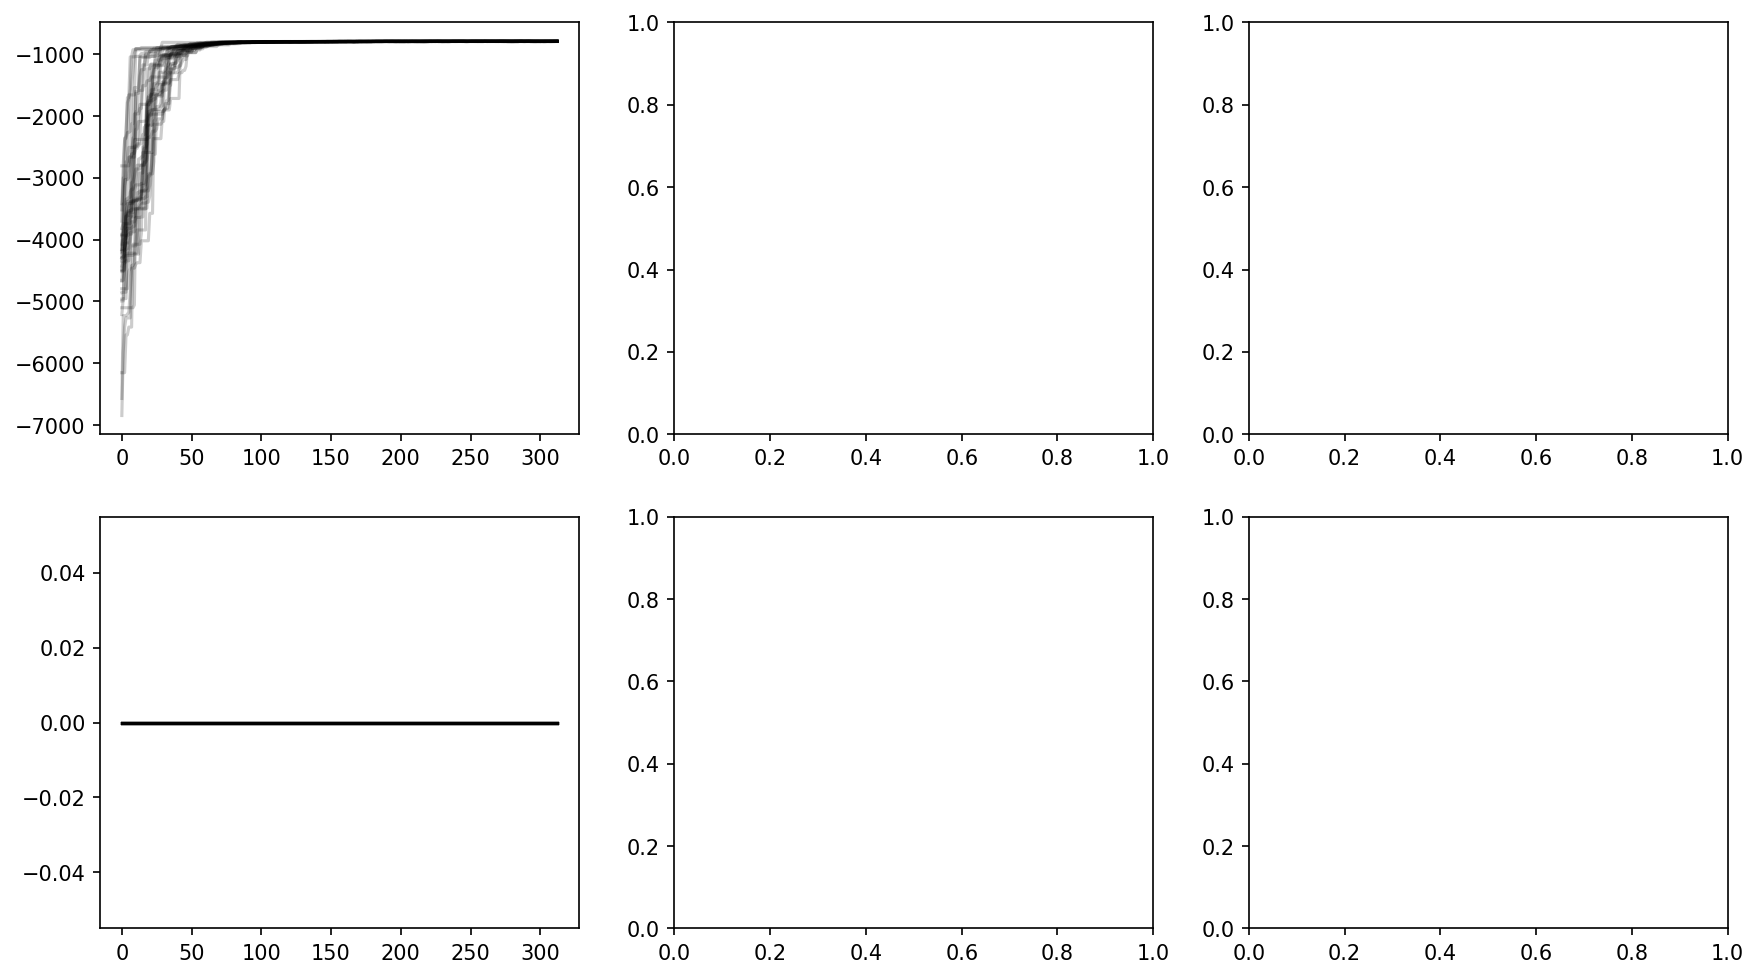

In [33]:
fig, ax = plt.subplots(2,3,dpi=150,figsize=(14,8))
ax[0,0].plot(prob1[:nsteps1],c='k',alpha=0.2)
#ax[0,1].plot(prob2[:nsteps2],c='k',alpha=0.2)
#ax[0,2].plot(prob3[:nsteps3],c='k',alpha=0.2)

ax[1,0].plot(np.exp(prob1[:nsteps1]),c='k',alpha=0.2)
#ax[1,1].plot(np.exp(prob2[:nsteps2]),c='k',alpha=0.2)
#ax[1,2].plot(np.exp(prob3[:nsteps3]),c='k',alpha=0.2)
plt.show()